In [ ]:
import sys
!{sys.executable} -m pip install matplotlib

import matplotlib.pyplot as plt
import simulation
import util
import importlib

importlib.reload(simulation)
importlib.reload(util)


In [326]:
speed_limit = 25                # mph
green_time = 30                 # s
yellow_time_multiple = 0.1      # s/mph
car_length = 16                 # ft
acceleration = 2                # m/s^2

partial_throughput_basic = lambda go_thresh, spacing: simulation.throughput_basic(util.mph_to_mps(speed_limit), green_time, speed_limit * yellow_time_multiple, util.ft_to_m(car_length), util.ft_to_m(spacing), util.ft_to_m(go_thresh), acceleration)


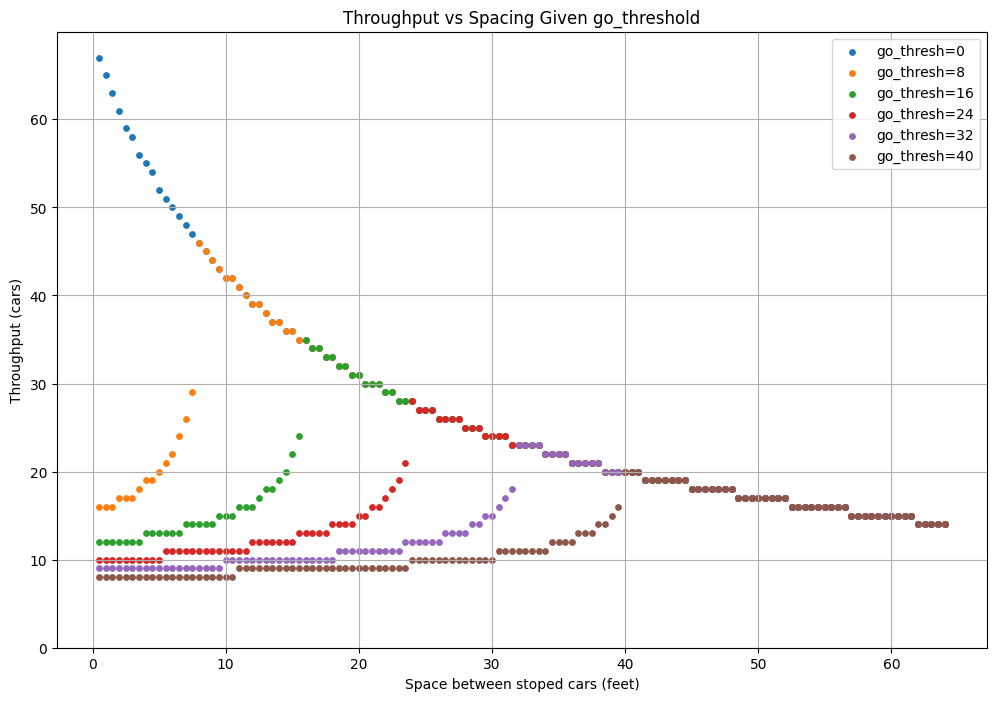

In [337]:
go_thresholds = range(0, 41, 8)
stopped_spacings = [x / 2 for x in range(1, 129)]

plots = []
for thresh in go_thresholds:
    spacing_throughput_basic = lambda space : partial_throughput_basic (thresh, space)
    throughput = list(map(spacing_throughput_basic, stopped_spacings))
    plots.append((thresh, throughput))

plt.figure(figsize=(12, 8))

for (th, plot) in plots:
    plt.scatter(stopped_spacings, plot, s=15, label=f'go_thresh={th}')

plt.ylim(bottom=0)

plt.legend()
plt.xlabel("Space between stoped cars (feet)")
plt.ylabel("Throughput (cars)")
plt.title(f'Throughput vs Spacing Given go_threshold')
plt.grid(True)
plt.show()
